In [35]:
import pandas as pda
import numpy as npy
import matplotlib.pyplot as plt
from IPython.display import display,Math,Latex
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

## Regresion logistica para predicciones bancarias

In [2]:
data = pda.read_csv("../../datasets/bank/bank.csv", delimiter=";")

In [3]:
data["education"] =="illiterate"

0       False
1       False
2       False
3       False
4       False
        ...  
4114    False
4115    False
4116    False
4117    False
4118    False
Name: education, Length: 4119, dtype: bool

In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [6]:
data["y"] = (data["y"] == "yes").astype(int)

In [7]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
data["education"] = npy.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = npy.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = npy.where(data["education"] == "basic.9y", "Basic", data["education"])
data["education"] = npy.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = npy.where(data["education"] == "professional.course", "Professional Course", data["education"])
data["education"] = npy.where(data["education"] == "university.degree", "University Degree", data["education"])
data["education"] = npy.where(data["education"] == "university.degree", "University Degree", data["education"])
data["education"] = npy.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = npy.where(data["education"] == "unknown", "Unknown", data["education"])

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [10]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [11]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


Text(0, 0.5, 'Frecuencia de compra')

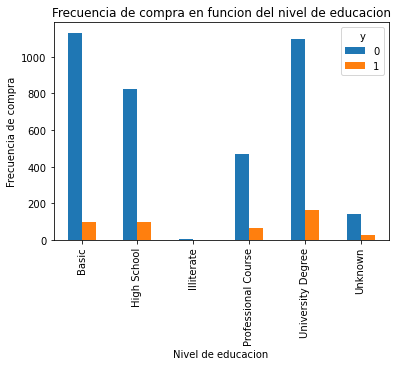

In [12]:
%matplotlib inline
pda.crosstab(data.education,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")
plt.xlabel("Nivel de educacion")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

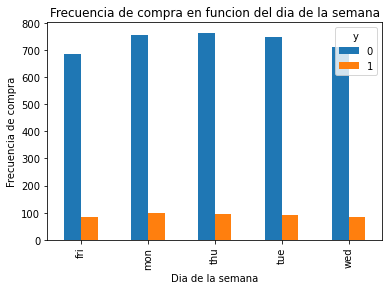

In [13]:
%matplotlib inline
pda.crosstab(data.day_of_week,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

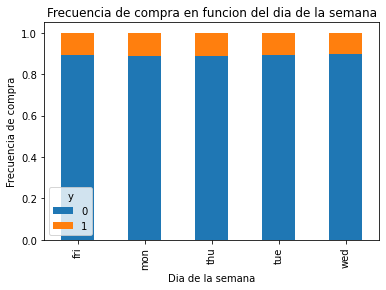

In [14]:
%matplotlib inline
table = pda.crosstab(data.day_of_week,data.y)
table.div(table.sum(1).astype(float),axis= 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

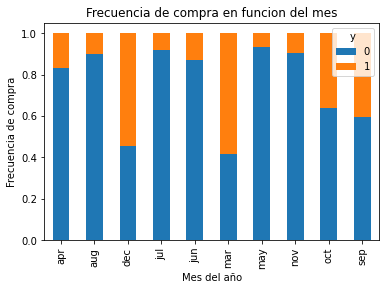

In [15]:
%matplotlib inline
table = pda.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float),axis= 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra')

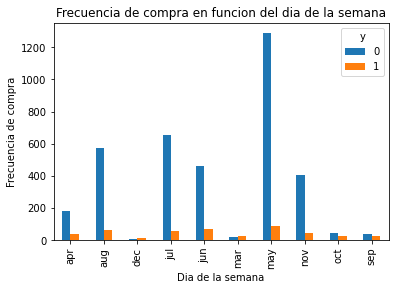

In [16]:
%matplotlib inline
pda.crosstab(data.month,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra")

Text(0.5, 0, 'Edad')

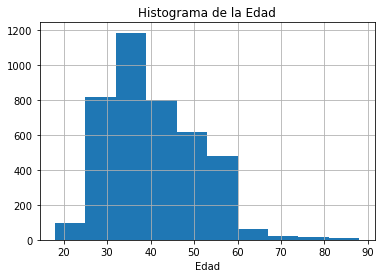

In [17]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")


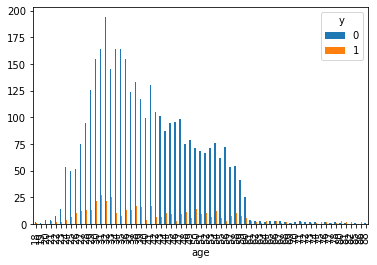

In [18]:
pda.crosstab(data.age,data.y).plot(kind="bar")

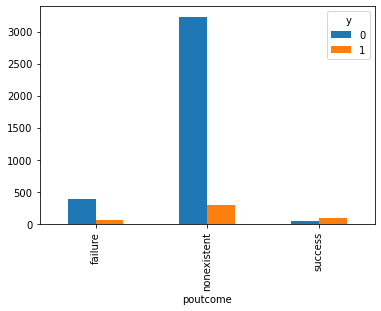

In [19]:
pda.crosstab(data.poutcome,data.y).plot(kind="bar")

In [20]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [21]:
categories = ["housing","default","loan","previous","job","marital","education","contact","month","day_of_week","poutcome",]

In [22]:
for category in categories:
    dummie = pda.get_dummies(data[category],prefix=category)
    data = data.join(dummie)

In [23]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [24]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'housing_no',
       'housing_unknown', 'housing_yes', 'default_no', 'default_unknown',
       'default_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'previous_0',
       'previous_1', 'previous_2', 'previous_3', 'previous_4',
       'previous_5', 'previous_6', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'edu

In [25]:
data_vars = data.columns.values.tolist()

In [26]:
to_keep = [v for v in data_vars if v not in categories]

In [27]:
bank_data = data[to_keep]    

In [28]:
bank_data.head()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,-0.1,93.200,-42.0,4.191,5195.8,0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
data.shape

(4119, 79)

In [36]:
bank_scaled_data = preprocessing.scale(bank_data)

In [37]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [v for v in bank_data_vars if v not in Y]

### Seleccion de rasgos para el modelo

In [41]:
n=12
lr = LogisticRegression()
rfe = RFE(lr,)
rfe = rfe.fit(bank_data[X],bank_data[Y].values.ravel())

C:\Users\JDCC\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=[12] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\JDCC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JDCC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i